In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_disease = pd.read_csv('heart.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Exploration

In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Preparation

Cleansing Data

In [6]:
(heart_disease == 'unknown')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
(heart_disease == np.nan)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Exploratory Data Analysis

In [8]:
heartcase = heart_disease.target.value_counts()
heartcase

1    526
0    499
Name: target, dtype: int64

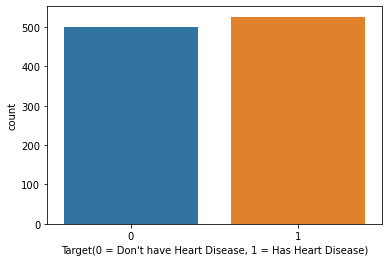

In [9]:
sns.countplot(x='target',data=heart_disease)
plt.xlabel("Target(0 = Don't have Heart Disease, 1 = Has Heart Disease)")
plt.show()

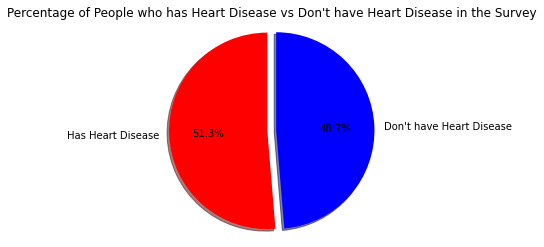

In [10]:
labels="Has Heart Disease","Don't have Heart Disease"
explode=(0.09,0)
colors=["#FF0000","#0000FF"]
fig1, ax1 = plt.subplots()
ax1.pie(heartcase, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Percentage of People who has Heart Disease vs Don't have Heart Disease in the Survey")
plt.show()

In [11]:
gender = heart_disease.sex.value_counts()
gender

1    713
0    312
Name: sex, dtype: int64

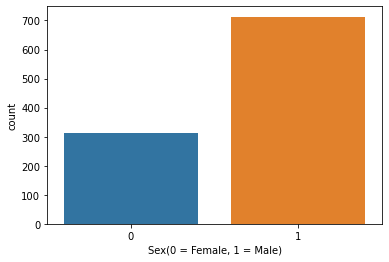

In [12]:
sns.countplot(x='sex',data=heart_disease)
plt.xlabel('Sex(0 = Female, 1 = Male)')
plt.show()

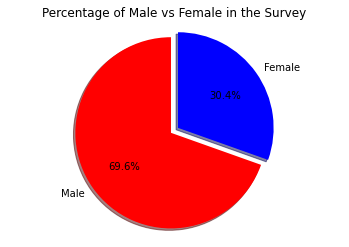

In [13]:
labels="Male","Female"
explode=(0.09,0)
fig1, ax1 = plt.subplots()
ax1.pie(gender, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Percentage of Male vs Female in the Survey")
plt.show()

In [14]:
crosstabST=pd.crosstab(heart_disease.target,heart_disease.sex)
crosstabST

sex,0,1
target,,
0,86,413
1,226,300


Text(0.5, 1.0, 'Gender Specific Heart Disease Frequency')

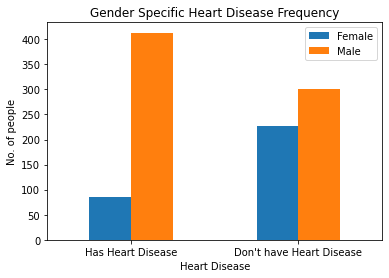

In [15]:
barplot=crosstabST.plot(kind='bar',rot=0)
barplot.set_xticklabels(labels=['Has Heart Disease', "Don't have Heart Disease"],rotation=0)
barplot.legend(['Female','Male'])
plt.ylabel("No. of people")
plt.xlabel("Heart Disease")
plt.title("Gender Specific Heart Disease Frequency")

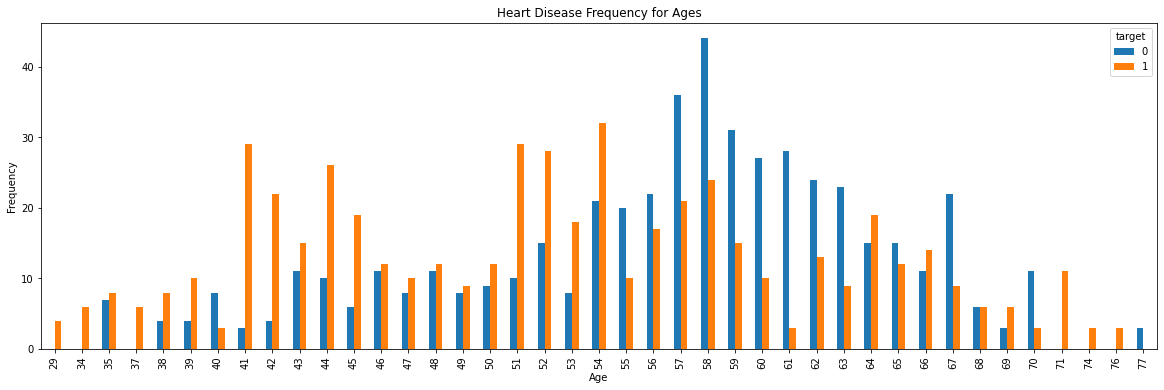

In [16]:
pd.crosstab(heart_disease.age,heart_disease.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [17]:
chestp = heart_disease.cp.value_counts()
chestp

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

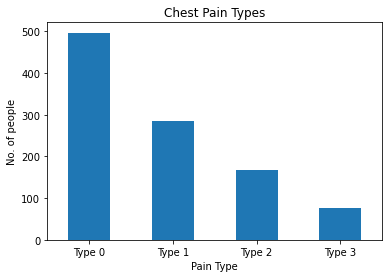

In [18]:
barplt= chestp.plot(kind='bar')
barplt.set_xticklabels(labels=['Type 0', 'Type 1', 'Type 2', 'Type 3'],rotation=0)
plt.xlabel("Pain Type")
plt.title("Chest Pain Types")
plt.ylabel("No. of people");

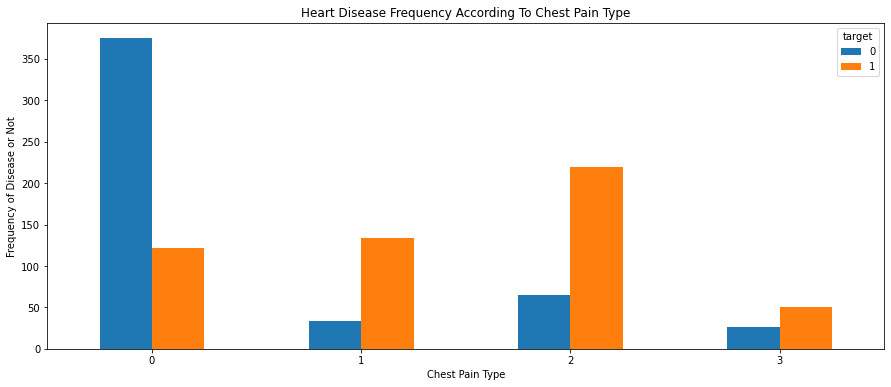

In [19]:
pd.crosstab(heart_disease.cp,heart_disease.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Data Pre-processing

In [20]:
y = heart_disease.target.values
x = heart_disease.drop(['target'], axis = 1)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

# Modeling Data

Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(x_train, y_train)

C:\Users\Aqila\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.metrics import classification_report

y_train_pred = log_model.predict(x_train)

print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train,y_train_pred))

y_test_pred = log_model.predict(x_test)

print('\nClassification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       354
           1       0.82      0.89      0.85       363

    accuracy                           0.85       717
   macro avg       0.85      0.85      0.85       717
weighted avg       0.85      0.85      0.85       717


Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.81      0.86       145
           1       0.85      0.92      0.88       163

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



In [33]:
from sklearn.metrics import confusion_matrix

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('0', '1'), ('0', '1'))

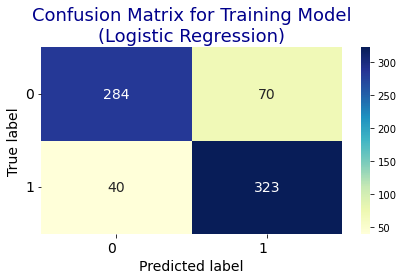

In [34]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('0', '1'), ('0', '1'))

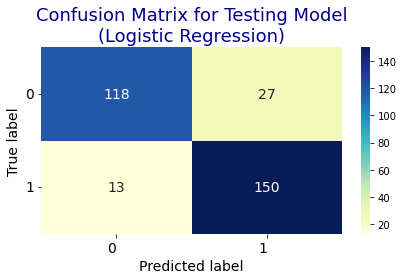

In [36]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier()


In [84]:
y_train_pred = rdf_model.predict(x_train)

#~Print classification report
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00       363

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717



In [86]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('0', '1'), ('0', '1'))

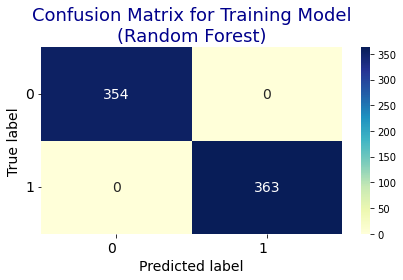

In [87]:
# Plot confusion matrix

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [80]:
y_test_pred = rdf_model.predict(x_test)

#~Print classification report
print('Classification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test,y_test_pred))

Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       163

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [88]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('0', '1'), ('0', '1'))

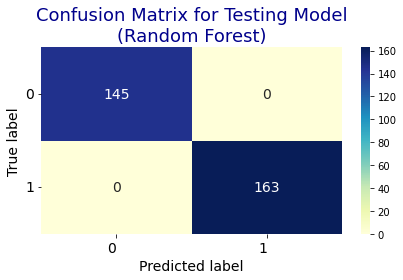

In [89]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Testing Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Gradient Boosting

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


In [104]:
y_train_pred = gbt_model.predict(x_train)

#~Print classification report
print('Classification Report Training Model (Gradient Boosting Classifier) :')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Gradient Boosting Classifier) :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       354
           1       0.98      0.99      0.99       363

    accuracy                           0.99       717
   macro avg       0.99      0.99      0.99       717
weighted avg       0.99      0.99      0.99       717



In [107]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('0', '1'), ('0', '1'))

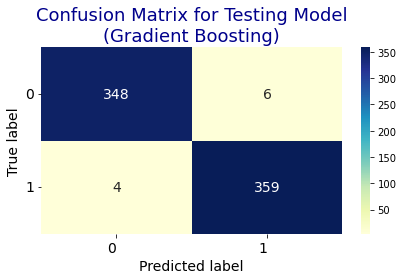

In [108]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [109]:
y_test_pred = gbt_model.predict(x_test)

#~Print classification report
print('Classification Report Training Model (Gradient Boosting Classifier) :')
print(classification_report(y_test,y_test_pred))

Classification Report Training Model (Gradient Boosting Classifier) :
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.97      0.99      0.98       163

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [110]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('0', '1'), ('0', '1'))

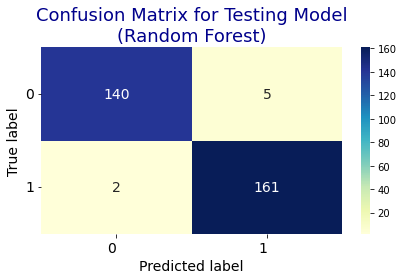

In [111]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Testing Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()